In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image, display
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import keras
from keras.layers import ZeroPadding2D, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.models import Sequential, Model

path_to_weights = "../vgg_face_weights.h5"

Using TensorFlow backend.


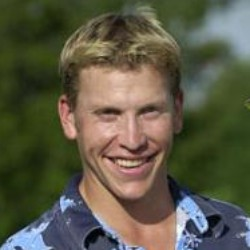

In [3]:
# Example of an image in the directory.

path_to_dir = './LabeledFacesInTheWild/'
img_path = 'Ricky_Barnes/Ricky_Barnes_0001.jpg'
full_path = path_to_dir + img_path

Image(filename=full_path, width=400, height=400)

In [4]:
# Creating VGG-Face model.

vgg_model = Sequential()  # Using simple sequential model.

vgg_model.add(ZeroPadding2D(padding=(1, 1), input_shape=(224, 224, 3)))  # Padding on the sides of every image.
vgg_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(ZeroPadding2D(padding=(1, 1)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3, 3), activation="relu"))
vgg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg_model.add(Conv2D(filters=4096, kernel_size=(7, 7), activation="relu"))
vgg_model.add(Dropout(rate=0.5))
vgg_model.add(Conv2D(filters=4096, kernel_size=(1, 1), activation="relu"))
vgg_model.add(Dropout(rate=0.5))
vgg_model.add(Conv2D(filters=2622, kernel_size=(1, 1), activation="relu"))
vgg_model.add(Flatten())
vgg_model.add(Activation(activation="softmax"))

W0715 15:20:06.778975 140678840440640 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 15:20:07.095545 140678840440640 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 15:20:07.179126 140678840440640 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 15:20:07.276502 140678840440640 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d i

In [5]:
# Loading pretrained face verification model.

vgg_model.load_weights(path_to_weights)

W0715 15:20:14.869831 140678840440640 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [24]:
def normalize(arr):
    tmp = arr.astype(np.float64)
    tmp /= 255
    return tmp

def image_processing(path_to_img, path_to_dir=path_to_dir):
    img = load_img(path_to_dir + path_to_img, target_size=(224, 224))
    arr = img_to_array(img)
    arr = np.expand_dims(arr, axis=0)
    arr = normalize(arr)
    return arr

#tmp = np.array([[255,2,0],[4,5,-255],[7,8,9]])
#normalize(tmp)

array([[ 1.        ,  0.00784314,  0.        ],
       [ 0.01568627,  0.01960784, -1.        ],
       [ 0.02745098,  0.03137255,  0.03529412]])

In [25]:
vgg_model_descriptor = Model(inputs=vgg_model.layers[0].input, outputs=vgg_model.layers[-2].output)

In [26]:
# Testing predictor.

img1 = image_processing("Bill_Gates/Bill_Gates_0001.jpg")
img2 = image_processing("Bill_Gates/Bill_Gates_0002.jpg")
img3 = image_processing("Zico/Zico_0001.jpg")

pred1 = vgg_model_descriptor.predict(img1)[0, :]
pred2 = vgg_model_descriptor.predict(img2)[0, :]
pred3 = vgg_model_descriptor.predict(img3)[0, :]

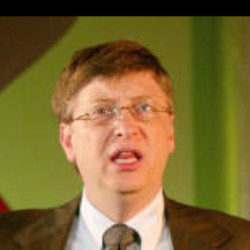

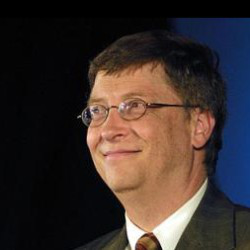

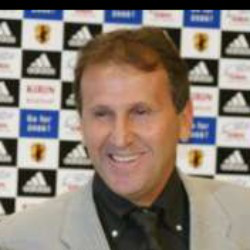

In [27]:
display(load_img(path_to_dir + "Bill_Gates/Bill_Gates_0001.jpg"))
display(load_img(path_to_dir + "Bill_Gates/Bill_Gates_0002.jpg"))
display(load_img(path_to_dir + "Zico/Zico_0001.jpg"))

In [28]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def verification_for_array(img1, img2, cos_threshold = 0.4, euc_threshold = 120, show_distances=False):
    """
    Returns True if model considers that there is the same person on photos.
    Otherwise, returns False.
    """
    
    pred1 = vgg_model_descriptor.predict(img1)[0, :]
    pred2 = vgg_model_descriptor.predict(img2)[0, :]
    
    cos_rez = findCosineDistance(pred1, pred2)
    euc_rez = findEuclideanDistance(pred1, pred2)
    
    if show_distances:
        print(f"Cosine Distance: {cos_rez}")
        print(f"Euclidean Distance: {euc_rez}")
    
    if cos_rez <= cos_threshold:
        return True, cos_rez, euc_rez
    else:
        return False, cos_rez, euc_rez

def verification(path1, path2, cos_threshold = 0.4, euc_threshold = 120, show_distances=False, show_pictures=False):
    """
    Returns True if model considers that there is the same person on photos.
    Otherwise, returns False.
    """
    img1 = image_processing(path1)
    img2 = image_processing(path2)
    
    if show_pictures:
        display(load_img(path_to_dir + path1))
        display(load_img(path_to_dir + path2))
    
    state, cos_rez, euc_rez = verification_for_array(img1, img2, cos_threshold=cos_threshold, 
                                                     euc_threshold=euc_threshold, show_distances=show_distances)
    
    return state, cos_rez, euc_rez

In [29]:
print(f"Cosine distance between img1 and img2: {findCosineDistance(pred1, pred2)}")
print(f"Cosine distance between img1 and img3: {findCosineDistance(pred1, pred3)}")
print(f"Cosine distance between img2 and img3: {findCosineDistance(pred2, pred3)}")
print()
print(f"Euclidean distance between img1 and img2: {findEuclideanDistance(pred1, pred2)}")
print(f"Euclidean distance between img1 and img3: {findEuclideanDistance(pred1, pred3)}")
print(f"Euclidean distance between img2 and img3: {findEuclideanDistance(pred2, pred3)}")

Cosine distance between img1 and img2: 0.21326404809951782
Cosine distance between img1 and img3: 0.24369049072265625
Cosine distance between img2 and img3: 0.2946842908859253

Euclidean distance between img1 and img2: 0.31468287110328674
Euclidean distance between img1 and img3: 0.3497063219547272
Euclidean distance between img2 and img3: 0.3965326249599457


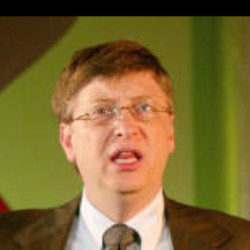

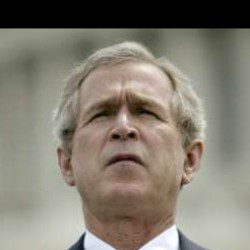

Cosine Distance: 0.2226036787033081
Euclidean Distance: 0.31574615836143494


(True, 0.2226036787033081, 0.31574616)

In [30]:
path_to_img1 = "Bill_Gates/Bill_Gates_0001.jpg"
path_to_img2 = "Bill_Gates/Bill_Gates_0002.jpg"
path_to_img3 = "Zico/Zico_0001.jpg"
path_to_img4 = "George_W_Bush/George_W_Bush_0513.jpg"

verification(path_to_img1, path_to_img4, show_distances=True, show_pictures=True)